In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

%matplotlib inline

# Sources:
* https://www.codingame.com/playgrounds/2358/how-to-plot-the-mandelbrot-set/mandelbrot-set
* https://en.wikipedia.org/wiki/Mandelbrot_set
* Gleick, J. (2008). Chaos: Making a new science. New York: Penguin Books. 

The sequence $z_n$ is defined by

* $z_0 = 0$
* $z_{n+1} = {z_n}^2 + c$

For each complex number $c$, we unfold the sequence $z_n$. If the sequence is bounded, e.g. the magnitude of the vector represented by the complex number's real and imaginary parts does not diverge, it is in the Mandelbrot set. If it is unbounded, that is, the magnitude crosses some arbitrary threshold after a certain number of iterations, it is not in the Mandelbrot set. 

The Mandelbrot set may be visualized by using the real and imaginary parts of each $c$ as the $x$ and $y$ coordinates of the Cartesian coordinate system. If that $c$ is in the Mandelbrot set, color it black. Otherwise, color it with a heat colormap that reflects how many iterations are required to exceed the chosen threshold. 

Here is a function that takes $c$ and returns the number of iterations required to diverge. The magnitude threshold to consider $z$ to have diverged is 2. We "give up" after 80 iterations - that is, if $z$ has not diverged after 80 iterations, we assume it is in the Mandelbrot set. 

In [2]:
MAX_ITER = 80

def mandelbrot(c):
    z = 0
    n = 0
    while abs(z) <= 2 and n < MAX_ITER:
        z = z*z + c
        n += 1
    return n

$c = 0$ is in the Mandelbrot set. 

In [3]:
mandelbrot(0)

80

However, $c = 1 + i$ exceeds a magnitude of 2 after only 2 iterations.

In [4]:
mandelbrot(1+1j)

2

# Visualization

We pick a starting and ending value for the $x$ and $y$ axes, representing the real and imaginary components of $c$. Then we iteration through all values, getting $n$ from `mandelbrot(c)`. When $n = 80$ (e.g., the number of iterations has reached our designated maximum value and we "assume" this value of $c$ doesn't diverge), we draw a black pixel, otherwise, we draw a color from black through red to white, with darker reds representing higher values of $n$ and brighter red representing lower values. Brighter reds (and white) are "hot" values of $c$ that diverge fast, while darker reds are "cooler" values of $c$ that do diverge, only more slowly.

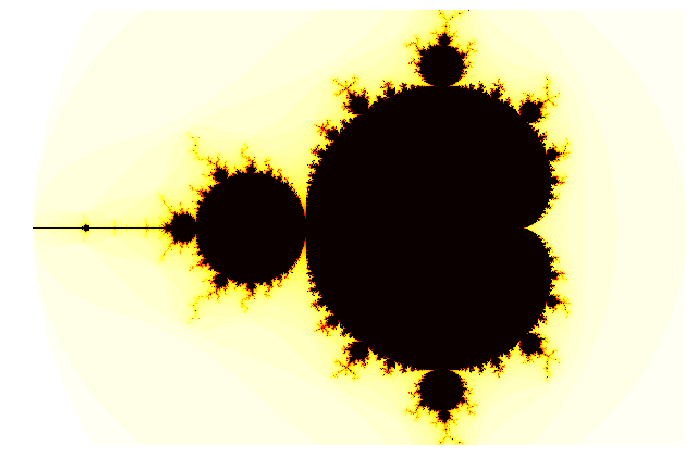

In [5]:
plt.close("all")
WIDTH = 600
HEIGHT = 400

RE_START = -2
RE_END = 1
IM_START = -1
IM_END = 1

img = np.zeros((HEIGHT, WIDTH))

for x in range(0, WIDTH):
    for y in range(0, HEIGHT):
        c = complex(RE_START + (x/WIDTH) * (RE_END - RE_START),
                    IM_START + (y/HEIGHT) * (IM_END - IM_START))
        m = mandelbrot(c)
        value = 1 - m/MAX_ITER
        img[y, x] = value

ax = plt.imshow(img, cmap='hot')

fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.axis("off")
plt.show()

Let's make a function out of this.

In [6]:
def show_mandelbrot(WIDTH, HEIGHT, RE_START, RE_END, IM_START, IM_END):
    plt.close("all")
    img = np.zeros((HEIGHT, WIDTH))

    for x in range(0, WIDTH):
        for y in range(0, HEIGHT):
            c = complex(RE_START + (x/WIDTH) * (RE_END - RE_START),
                        IM_START + (y/HEIGHT) * (IM_END - IM_START))
            m = mandelbrot(c)
            value = 1 - m/MAX_ITER
            img[y, x] = value

    ax = plt.imshow(img, cmap='hot')

    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.axis("off")
    plt.show()

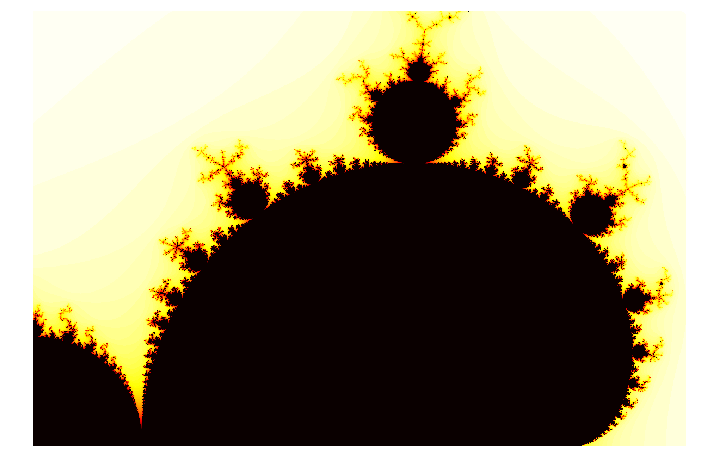

In [7]:
show_mandelbrot(1200, 800, -1, 0.5, -1, 0)

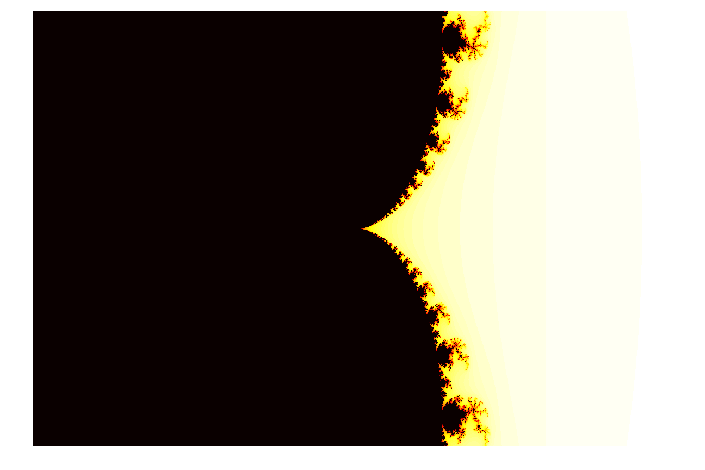

In [8]:
show_mandelbrot(1200, 800, -0.25, 0.75, -0.25, 0.25)

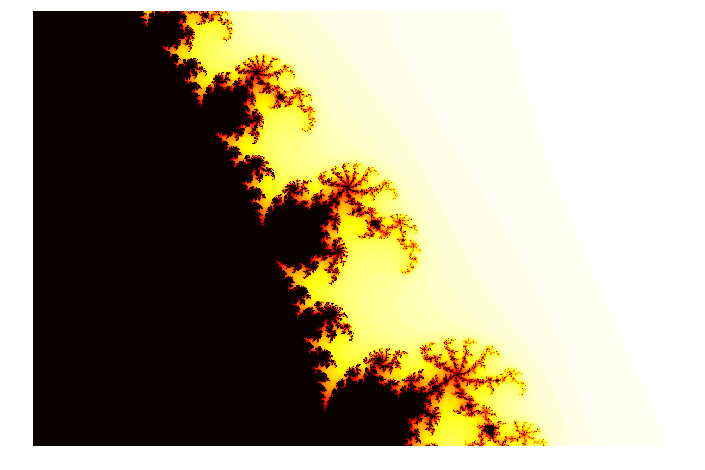

In [9]:
show_mandelbrot(1200, 800, 0.30, 0.45, 0.05, 0.15)

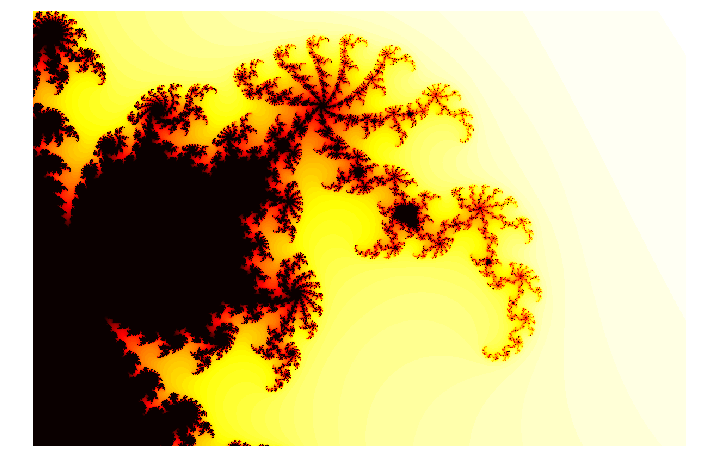

In [10]:
show_mandelbrot(1200, 800, 0.35, 0.40, 0.1-0.017, 0.1+0.017)